## Airbnb Dataset

### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

### Content
The following Airbnb activity is included in this Seattle <a href='https://www.kaggle.com/airbnb/seattle/data'>dataset</a> :

- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

### Inspiration
- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?<br/>
For more ideas, visualizations of all Seattle datasets can be found <a href='http://insideairbnb.com/seattle/'>here</a>.

### Acknowledgement
This dataset is part of Airbnb Inside, and the original source can be found <a href='http://insideairbnb.com/get-the-data.html'>here</a>.



## Analysis Procedures <a id='top'>(CRISP-DM)</a>


### 1. Business understanding

**From the business perspective, at the end of the analysis we want to ask below questions: <br/>**
- [Can you build a price suggestor for listings? which features impact the price most?](#q1)<br>
- [What are the attributes of listings with higher review scores? ](#q2)<br>
- [How the price changes over one year? ](#q3)<br>
- [What are the busiest times of the year to visit Seattle?](#q4)<br>


    
### 2. [Data understanding](#p2)
    - Explore data by understanding features, using pandas functions and visual tools.
    
### 3. [Data preparation](#p3)
    - Handle missing values and categorical values.
    - Perform data cleaning and feature engineering.

### 4. [Modelling](#p4)
    
    - Use regression models to predict price of listings.

### 5. [Results](#p5)
    - Answer business questions with data and visualization methods.

## <a id='p2'>2. Data understanding </a>

### Summary of datasets
In this part, the three datasets in csv format is imported into dataframes using `pandas`, **and explored using  pandas functions in below cells.** The information obtained about the datasets is summarized in below paragrahs in this cell.

**Calender dataset** contains the price information for each listing in a calender year. There are 3818 unique `listing_id` in the dataset, and for each `listing_id` there are 365 rows of price corresponding one day between _2016-01-04 and 2017-01-02_ .<br>
The `available` column has two unique values _'t' or 'f'_ meaning _True or False_. When a listing is not available for the day, the columns `price` is _nan_.

**Listing dataset** contains the full description for each listing scraped on _2016-01-04_ , with 3818 rows describing 3818 unique listings. <br>
There are 92 columns/features in this dataset, thus a lot of information that need to be selectively used in later session. <br>
Telling from the column names, the features can be roughly divided into below categories: listing info, host info, location, room/house info, price and booking, reviews, and policies.

**Reviews dataset** contains all the review entries for above mention 3818 listings by _2016-01-03_ since 2009. Each row records the review's info and the detailed text comments for a listing in a certain day, without a numerical score feature. <br>
_The positivity of each comments could be predicted through a NLP modelling, but it's not in the objectives of this analysis and the _listing_ dataset already have features of reviews in numerical scores. <br>
This dataset can be used to estimate the occupancy_rate in the previous years.<br>
<br>
[**Back to Top**](#top)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# import datasets
calender_path = '/Users/clairegong/Desktop/UdacityDataScienceNanoDegree/seattle airbnb dataset/calendar.csv'
listing_path = '/Users/clairegong/Desktop/UdacityDataScienceNanoDegree/seattle airbnb dataset/listings.csv'
reviews_path = '/Users/clairegong/Desktop/UdacityDataScienceNanoDegree/seattle airbnb dataset/reviews.csv'

calender=pd.read_csv(calender_path)
listing=pd.read_csv(listing_path)
reviews=pd.read_csv(reviews_path)


### calender dataset

In [3]:
calender.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
# there are 3818 listing_ids in calender dataset
calender.listing_id.nunique()

3818

In [6]:
# each listing_id has 365 entries
calender.listing_id.value_counts().head()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
Name: listing_id, dtype: int64

In [7]:
# check date range of calender dataset
print('Date range of calender data is between {} and {}.'.format(calender.date.min(),calender.date.max()))

Date range of calender data is between 2016-01-04 and 2017-01-02.


### listing dataset

In [8]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
# comment out below to see listing info, there are 92 columns and 3818 entries
# listing.info() 

In [10]:
#comment out to check columns
# listing.columns # 92 columns

### reviews dataset

In [11]:
#check reviews dataset
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [13]:
print('Date range of review data is between {} and {}.'.format(reviews.date.min(),reviews.date.max()))

Date range of review data is between 2009-06-07 and 2016-01-03.


## <a id='p3'>3. Data preparation</a>

The _listing_ and _calender_ datasets will be processed in this section to be ready for comsumption for prediction models. <br/>
Pre-processing will include below: 
- [feature engineering](#ft)
- [data cleaning](#cl)
- [missing values imputing](#cl)
- [categorical values imputing](#cl)
<br>

[ **Back to Top** ](#top)

### Calender dataset

In [14]:
#Data cleaning
# remove dollar signs $ and , in the price feature
calender.price = calender.price.replace('[\$,\,]','', regex=True)
calender.price = pd.to_numeric(calender.price)

# modify available feature to boolean values to be meaningful, and convenient for furthur calculation.
calender.available.replace({'t':True, 'f': False}, inplace=True)
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null bool
price         934542 non-null float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 33.2+ MB


#### Make new features: `neighbourhood`,`availability`, `mean_price`

In [15]:
#Feature engineering
# One of our purposes is to see the price trends, considering neighborhoods, so I need to extract the useful 
# neighbourhood features from the listing dataset. After some checking, neighbourhood_group_cleansed feature 
# is the best one, merge this feature to the calender dataset.
neighourhood_group=listing[['id','neighbourhood_group_cleansed']].\
    rename(columns={'id':'listing_id','neighbourhood_group_cleansed':'neighbourhood'})
calender = calender.merge(neighourhood_group, how='left')

calender.sample(5)

,listing_id,date,available,price,neighbourhood
1337929,4518474,2016-07-26,True,138.0,Other neighborhoods
1161975,6727846,2016-07-02,True,115.0,Queen Anne
495805,4210585,2016-05-18,True,212.0,Downtown
1229416,103466,2016-04-09,True,120.0,Other neighborhoods
712140,7630155,2016-01-29,True,80.0,Beacon Hill


In [71]:
# caculate the yearly availability and mean_price for each listing using calender dataset

availability=calender.groupby('listing_id').available.mean().reset_index(name='availability')
mean_price=calender.groupby('listing_id').price.mean().reset_index(name='mean_price')

### Listing dataset <a id='ft'>features selection<a>

This dataset has too many(i.e. 92) features, it is known that models trained with too many features are prone to overfit and predict badly on unseen data, thus I need to select those possibly useful in answering our business questions, i.e. predicting prices and scores. Features with descriptive text values is not useful in this context
so I will exclude them all, with the exception for a few with categorical values. Also features that are likely to impact on price and review score but not much, are also discarded.

To select features, I personally examine EVERY feature here, to be more efficient I examine features by BATCH of 10.<br>
**Examing** includes but is not limited to: checking <br>
- the unique values of categorical values by `nunique` `value_counts`
- the number of missing values by `isnull`
- data distribution of numerical values by `describe`
- comparing features with similar names by `filter`
- and so on


**Below are some features that I discarded as they will provide little information on predicting prices and review scores. Accompanying the feature names are some thoughts written for readers' reference.** <br>
- _experiences_offered_ : 3055/3055 is 'none'
- _host_acceptance_rate_ : 3044/3045 is 100%
- _host_total_listings_count_ : has same info as host_listings_count
- _host_verifications_ : could be useful, by splitting list into elements then into categorical values such as 'has_email', but is not worth the effort in this case.
- _host_has_profile_pic_ : 3809/3817 True
- _square_feet_ : is 97.4% missing using #listing.square_feet.isnull().mean()
- _weekly_price_ : is 47.3% missing, it could be organized to a no_weekly_price feature, but will be discarded in this context.
- _monthly_price_ : is 60.3% missing, reason to discard is as above.
- _calendar_updated_ : values could be unified into number of days ago, but it will be discarded in this context.
- _has_availability_ : 100% True
- _availability_30_ : and it stands for how many days the room is available in the next 30 days. availability_num features follows the same logic. Listing dataset will be used to predict price and score, so these features I think are less significant. To calculate availability, calender dataset can be used instead.
- _review_scores_xx_ : features I only keep one feature: review_scores_rating as it is representive of overall experience.
- _requires_license_ : 100% False
- _require_guest_profile_picture_ : 3497/3828 False, this could be useful but considered not significant, thus is discarded.
- _require_guest_phone_verification_ : reason to discard is similar to above.
- _host_since_ feature can be used to tell the experience of the host, discarded here as I am not familiar with datetime parsing.

<font color='blue'>**After-thought**: It's still time-consuming, an alternative way is to use df.corr() after data cleaning and remove features with little correlations directly. Another way is after preprocessing using Lasso to select features.</font><br>

**Below cells are some example codes to examine the feature.**<br>

In [17]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [18]:
# Explore "score" features
scores=listing.filter(like='score')
scores.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [19]:
# check sum of 10-scale review_scores, it is not equal to the 100-scale review_scores_rating. So use the latter one.
scores['scores_sum']=listing.filter(like='score').iloc[:,1:].sum(axis=1)
scores[['review_scores_rating','scores_sum']].head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_scores_rating,scores_sum
0,95.0,59.0
1,96.0,60.0
2,97.0,60.0
3,NaN,0.0
4,92.0,56.0


In [20]:
#check numerical feature distribution
listing.reviews_per_month.describe()

count    3191.000000
mean        2.078919
std         1.822348
min         0.020000
25%         0.695000
50%         1.540000
75%         3.000000
max        12.150000
Name: reviews_per_month, dtype: float64

In [21]:
#check categorical feature distribution
listing.require_guest_profile_picture.value_counts()#.sort_index()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

In [22]:
# Codes for examining features by batch of 10 
listing.iloc[:,0:10].sample()
listing.iloc[:,10:20].sample()
listing.iloc[:,20:30].sample()
listing.iloc[:,30:40].sample()
listing.iloc[:,40:50].sample()
listing.iloc[:,50:60].sample()
listing.iloc[:,60:70].sample()
listing.iloc[:,70:80].sample()
listing.iloc[:,80:90].sample()
listing.iloc[:,90:100].sample()

,calculated_host_listings_count,reviews_per_month
616,1,1.36


### Finally! I have the features I need

In [23]:
# update features and update listing dataset 
features = ['id','host_response_time','host_response_rate','host_is_superhost','host_listings_count',\
            'host_identity_verified','neighbourhood_group_cleansed','is_location_exact','property_type','room_type',\
           'accommodates','bathrooms','bedrooms','beds','bed_type','amenities','security_deposit',\
            'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews',\
           'review_scores_rating','instant_bookable','cancellation_policy','reviews_per_month']

listing_cleansed=listing[features]
listing_cleansed.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,...,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,241032,within a few hours,96%,f,3.0,t,Queen Anne,t,Apartment,Entire home/apt,...,NaN,2,$5.00,1,365,207,95.0,f,moderate,4.07
1,953595,within an hour,98%,t,6.0,t,Queen Anne,t,Apartment,Entire home/apt,...,$40.00,1,$0.00,2,90,43,96.0,f,strict,1.48
2,3308979,within a few hours,67%,f,2.0,t,Queen Anne,t,House,Entire home/apt,...,$300.00,10,$25.00,4,30,20,97.0,f,strict,1.15
3,7421966,NaN,NaN,f,1.0,t,Queen Anne,t,Apartment,Entire home/apt,...,NaN,1,$0.00,1,1125,0,NaN,f,flexible,NaN
4,278830,within an hour,100%,f,2.0,t,Queen Anne,t,House,Entire home/apt,...,$125.00,6,$15.00,1,1125,38,92.0,f,strict,0.89


   ### Manufacture potentially useful new features from available data

In [24]:
# Amenities values are long strings of amenties, convert its value to number of amenties instead.
amenities=listing.amenities.str.split(',')
listing_cleansed['amenities']=amenities.apply(lambda row: len(list(row))) # get the length of amentity list

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Add the yearly availability and mean_price caculated earlier from calender dataset to the listing dataset

listing_cleansed=listing_cleansed.merge(availability,left_on='id', right_on='listing_id').merge(mean_price)
listing_cleansed.drop(['listing_id','id'],axis=1,inplace=True)

In [26]:
listing_cleansed.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,...,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,occupancy_rate,mean_price
0,within a few hours,96%,f,3.0,t,Queen Anne,t,Apartment,Entire home/apt,4,...,$5.00,1,365,207,95.0,f,moderate,4.07,0.947945,85.000000
1,within an hour,98%,t,6.0,t,Queen Anne,t,Apartment,Entire home/apt,4,...,$0.00,2,90,43,96.0,f,strict,1.48,0.797260,170.931271
2,within a few hours,67%,f,2.0,t,Queen Anne,t,House,Entire home/apt,11,...,$25.00,4,30,20,97.0,f,strict,1.15,0.602740,1301.818182
3,NaN,NaN,f,1.0,t,Queen Anne,t,Apartment,Entire home/apt,3,...,$0.00,1,1125,0,NaN,f,flexible,NaN,0.391781,100.000000
4,within an hour,100%,f,2.0,t,Queen Anne,t,House,Entire home/apt,6,...,$15.00,1,1125,38,92.0,f,strict,0.89,1.000000,462.739726


In [27]:
listing_cleansed.shape

(3818, 28)

### <a id='cl'>Data cleaning</a>
includes ...
- Remove the %, $ unit symbols from value features, convert format to numerical types.
- Convert f/t binary features values to binary features using 0/1
- Fill missing values
- Drop duplicates
- Get dummies of categorical values

In [28]:
#Remove the %, $ unit symbols from value features, convert format to numerical types.
for feature_with_symbol in ['cleaning_fee','extra_people','host_response_rate','security_deposit']:
    no_symbol = listing_cleansed[feature_with_symbol].replace('[\$,\%]','', regex=True)
    listing_cleansed[feature_with_symbol] = pd.to_numeric(no_symbol)

In [29]:
# For features having two categories only, knowing one indicates the other, thus replace them with '1'&'0', 
#no need one-hot encoding.
binary_features=['host_is_superhost','host_identity_verified', 'is_location_exact', 'instant_bookable']
listing_cleansed[binary_features]=listing_cleansed[binary_features].replace({'t':1, 'f':0})

In [30]:
#handling missing values
# target features 'mean_price' no missing values, 'review_scores_rating' has 647 missing values, later need to drop 
# rows for review_scores_rating is missing
listing_cleansed.isnull().sum()

# check 0 dulicates
listing_cleansed.duplicated().sum()

# Note for fee-related columns, Nan value is equivalent to 0, thus fill missing values with 0.
listing_cleansed[['security_deposit','cleaning_fee']]=\
    listing_cleansed[['security_deposit','cleaning_fee']].fillna(0.0)

# fill in columns with missing values by 'mode' for categorical values, and by 'mean' for numerical values
categorical_features=listing_cleansed.select_dtypes(include=['object']).columns.tolist()
numerical_features=listing_cleansed.select_dtypes(exclude=['object']).columns.tolist()

# import imputer to fill missing values
from sklearn.impute import SimpleImputer
imp_med=SimpleImputer(strategy='median')
imp_mode=SimpleImputer(strategy='most_frequent')

#impution is done 
listing_cleansed[categorical_features]=pd.DataFrame(imp_mode.fit_transform(listing_cleansed[categorical_features]))
listing_cleansed[numerical_features]=pd.DataFrame(imp_med.fit_transform(listing_cleansed[numerical_features]))

#check that dataset is ready
listing_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 28 columns):
host_response_time              3818 non-null object
host_response_rate              3818 non-null float64
host_is_superhost               3818 non-null float64
host_listings_count             3818 non-null float64
host_identity_verified          3818 non-null float64
neighbourhood_group_cleansed    3818 non-null object
is_location_exact               3818 non-null float64
property_type                   3818 non-null object
room_type                       3818 non-null object
accommodates                    3818 non-null float64
bathrooms                       3818 non-null float64
bedrooms                        3818 non-null float64
beds                            3818 non-null float64
bed_type                        3818 non-null object
amenities                       3818 non-null float64
security_deposit                3818 non-null float64
cleaning_fee                    38

In [31]:
#make a copy for review_score analysis
listing_cleansed_reviews=listing_cleansed.copy()

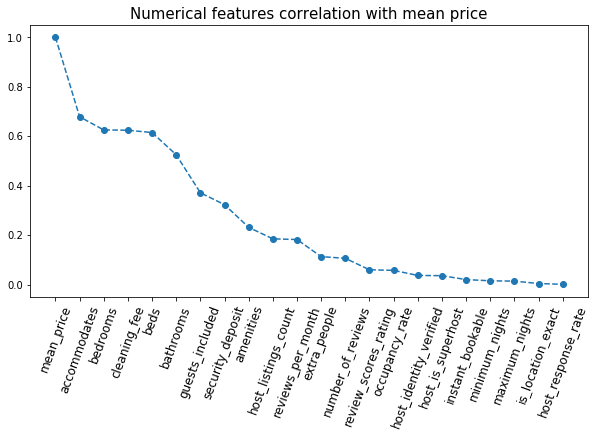

In [32]:
#Price analysis
# As time is not a feature here, use mean_price instead of price.
# now data is processed, let's check the (numerical) features' correlations with the target 'mean_price'.

price_corr=listing_cleansed.corr()[['mean_price']].apply(lambda x: abs(x)).\
    sort_values(by=['mean_price'],ascending=False)

plt.subplots(figsize=[10,5])
plt.plot(price_corr, 'o--')
plt.title('Numerical features correlation with mean price', size=15)
plt.xticks(rotation=70, size=12);

# tried removing features with low corr < 0.1, modelling score is worse. Thus keep.

In [33]:
# slope is gentle for corr value <0.1, remove these features, only keep features with corr >0.1
# numerical_features_drop=price_corr[price_corr<0.1].dropna().index.tolist()
# listing_cleansed.drop(numerical_features_drop,axis=1,inplace=True)

# numerical_features_new=price_corr[price_corr>0.1].dropna().index.tolist()
# numerical_features_new

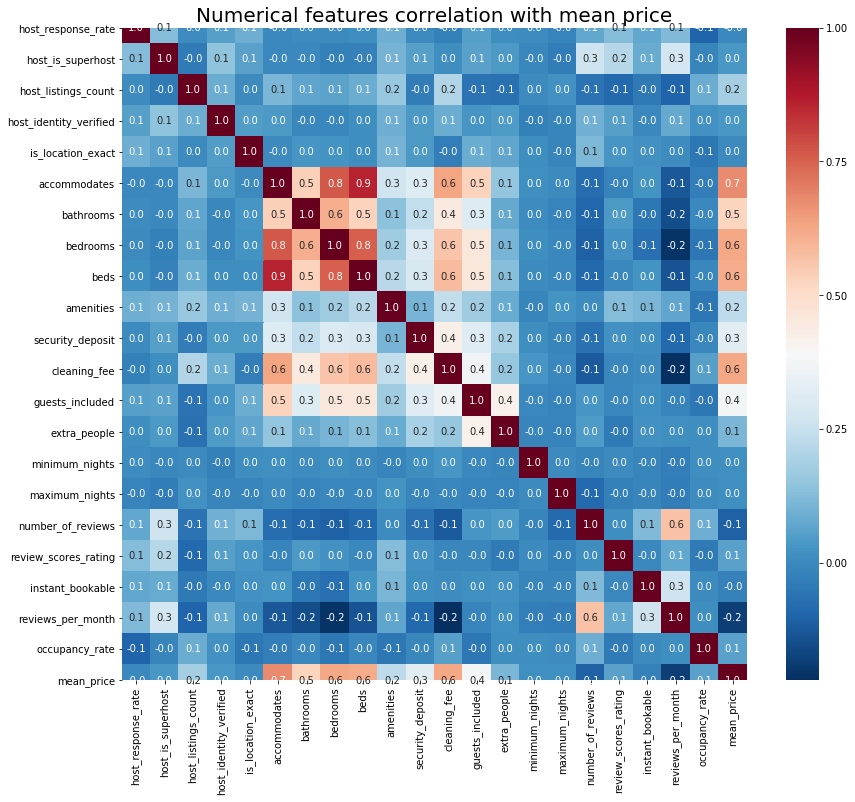

In [34]:
numerical_listing=listing_cleansed[numerical_features]
plt.subplots(figsize =(14, 12))
sns.heatmap(numerical_listing.corr(), annot=True,cmap='RdBu_r', fmt=".1f");
plt.title('Numerical features correlation with mean price',size=20);

- - - - - - - - - -  mean price vs categorical features - - - - - - - - - - 


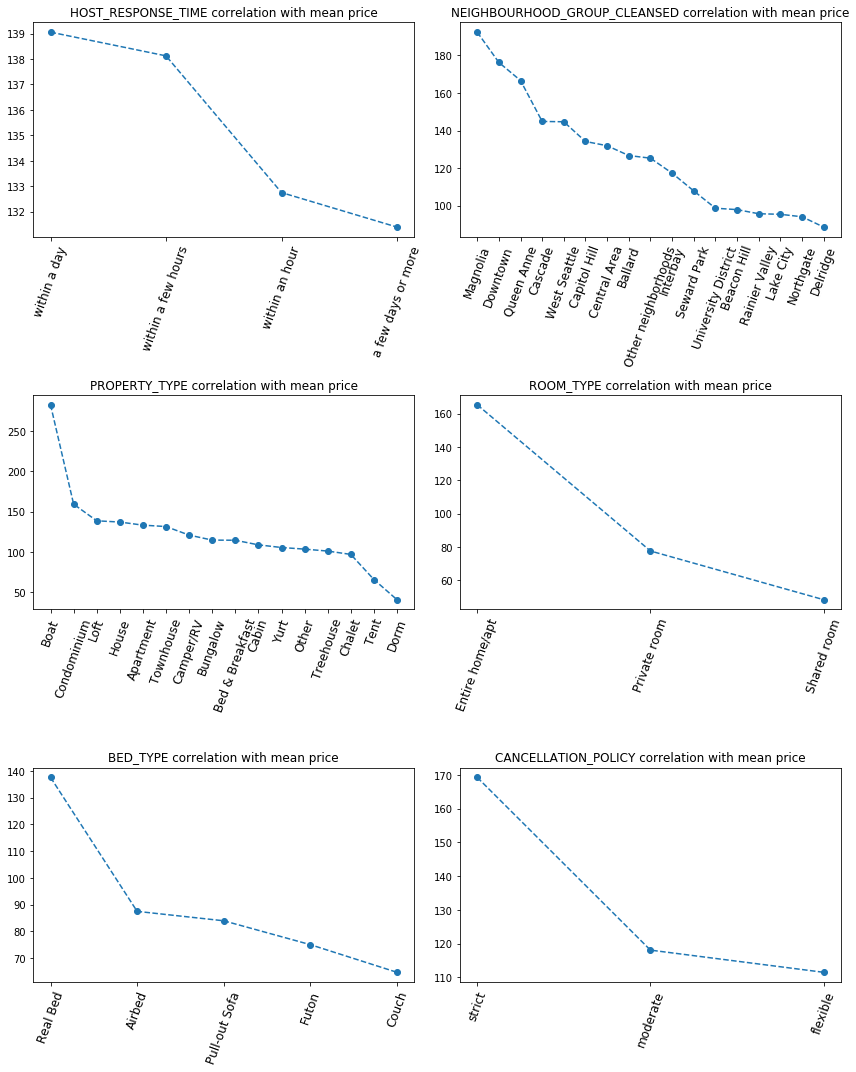

In [35]:
# check categorical features's impact on price

print('- '*10,'mean price vs categorical features','- '*10)
i=1
plt.subplots(figsize=[12,15])
for feature in categorical_features:
    corr=listing_cleansed.groupby(feature).mean_price.mean().sort_values(ascending=False)
    plt.subplot(3, 2, i)
    plt.plot(corr, 'o--')
    plt.title('{} correlation with mean price'.format(feature.upper()))
    plt.xticks(rotation=70, size=12);
    i+=1
    plt.tight_layout()
    
# Comments on output data
# 1. host_response_time NO correlation, as most active response corresponds to lowest price.
# other features ALL show great seperation of price range


# update categorical_features for precie suggester
# categorical_features_price= ['neighbourhood_group_cleansed', 'property_type',
#        'room_type', 'bed_type', 'cancellation_policy']
listing_cleansed.drop('host_response_time',axis=1,inplace=True)

In [36]:
# one hot encode categorical values
listing_encoded=pd.get_dummies(listing_cleansed)

Text(0.5, 1, 'Categorical features correlation with mean price')

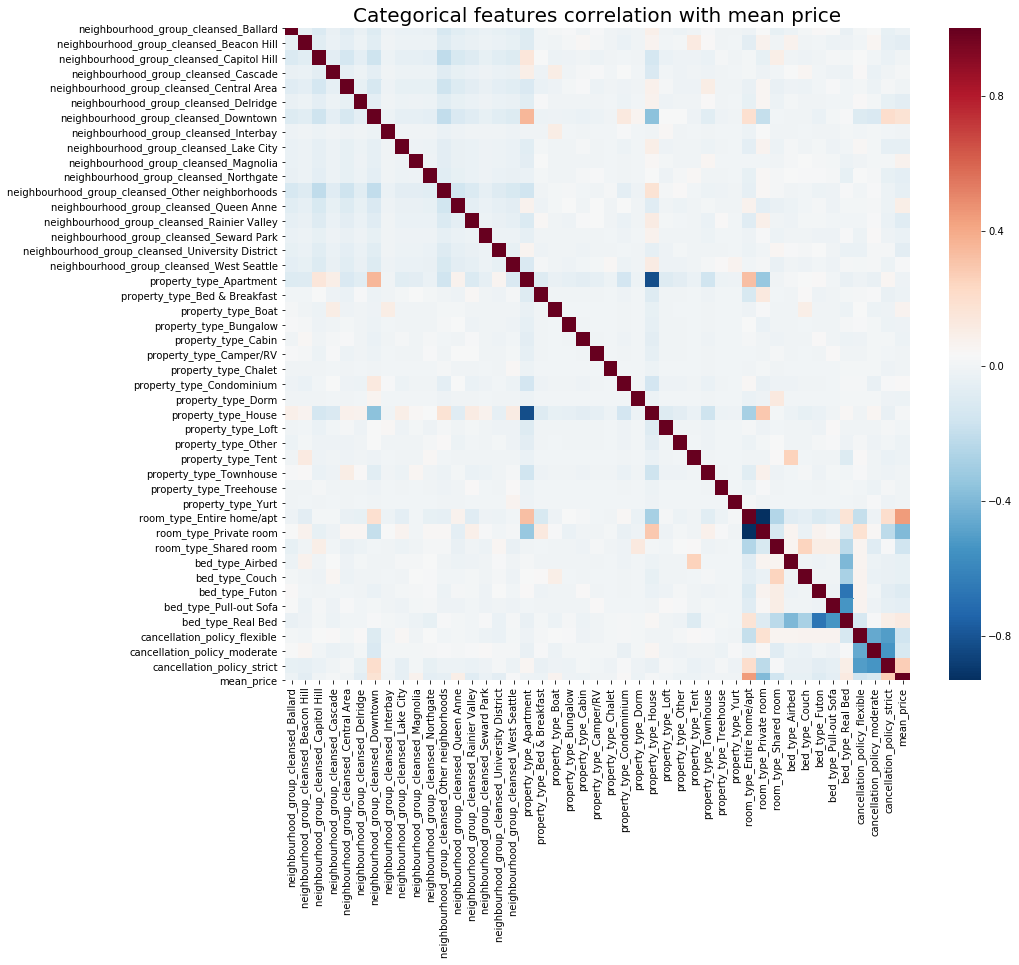

In [37]:
# we can correlation heatmap to check features correlation also

categorical_listing=listing_encoded.drop(numerical_features,axis=1)
#add 'mean_price' feature to categorical group to see correlation
categorical_listing[['mean_price']]=listing_cleansed[['mean_price']]

plt.subplots(figsize =(14, 12))
sns.heatmap(categorical_listing.corr(), annot=False,cmap='RdBu_r');
plt.title('Categorical features correlation with mean price',size=20)

## <a id='p4'>4. Modelling of price predictor</a>

In [38]:
# Prepare data for price and review score predictor

from sklearn.model_selection import train_test_split

# try Lasso as its regularization part can help to select features by limiting some feature coefficients to 0
# try Ridge as its L2 regularization can help overfitting issue
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# random forest is a good model for starters, although it is prone to overfit
from sklearn.ensemble import RandomForestRegressor

#best r2_score is 1, score 0 is for constand predictor
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler


price_data=listing_encoded.drop(['mean_price'], axis=1)
price_target=listing_encoded['mean_price'] # use mean_price to eliminate time facotr

X_train_p,X_test_p,y_train_p, y_test_p=train_test_split(price_data,price_target, train_size=0.8, random_state=0)

scaler=StandardScaler()
X_train_p=scaler.fit_transform(X_train_p)
X_test_p=scaler.transform(X_test_p)

In [39]:
# linear regression model
lr_model=LinearRegression()
lr_model.fit(X_train_p,y_train_p)
y_preds_lr=lr_model.predict(X_test_p)
score_p_lr=r2_score(y_preds_lr,y_test_p)
print('train score is : ',lr_model.score(X_train_p,y_train_p)) #0.66
print('test score is : ', score_p_lr) #-0.0026246719520286454, (same score using normalizer or standardscaler)
#negative score means model is worse than a constant predictor
# it is due to overfitting with 60 features.

train score is :  0.6642037680288279
test score is :  -0.0026246719249187755


### Best linear model: Ridge 

In [40]:
# try Ridge as its L2 regularization can help overfitting issue
rd_model=Ridge(alpha=1.0) # alpha values from 0.5 ~10 no impact on scores
rd_model.fit(X_train_p,y_train_p)
y_preds_rd=rd_model.predict(X_test_p)
score_p_rd=r2_score(y_preds_rd,y_test_p)
print('train score is : ',rd_model.score(X_train_p,y_train_p)) #0.66
print('test score is : ', score_p_rd) #0.35307522470474817 

train score is :  0.6642028678985894
test score is :  0.35307522470474817


In [41]:
# try Lasso model as it can reduce irrelevant features
ls_model=Lasso(alpha=0.5) # default alpha is 1.0, tried a few values found 0.5 is best
ls_model.fit(X_train_p,y_train_p)
y_preds_ls=ls_model.predict(X_test_p)
score_p_ls=r2_score(y_preds_ls,y_test_p)
print('train score is : ',ls_model.score(X_train_p,y_train_p)) #0.66
print('test score is : ', score_p_ls) #0.32056379297766635, score is better than linear regression

print(ls_model.coef_)
# Lasso model can push cooeffients for some features to 0, through regularization

train score is :  0.6629245044819085
test score is :  0.32056379297766635
[ 7.13906367e-01  3.77619859e+00  4.64950982e+00 -2.53540485e-02
  1.39169539e-01  2.06880436e+01  1.63725667e+01  2.13230572e+01
  1.11827260e+00  0.00000000e+00  4.15471124e+00  1.78069368e+01
  8.17918968e-01  0.00000000e+00 -0.00000000e+00  1.32060183e-01
 -1.21760297e+00  4.50423113e+00 -5.26483311e-01 -2.88445856e+00
  9.00327319e+00 -2.93948798e-01 -1.17763212e+00  7.72391610e+00
  3.53775436e+00  1.59486157e-02 -1.19510029e+00  1.59365008e+01
  7.43015558e-01 -8.32943864e-01  3.00846072e+00 -2.73958815e+00
 -4.88798134e-01  8.46881189e+00 -3.63278830e+00 -1.78858826e+00
 -7.80691206e-01  0.00000000e+00 -0.00000000e+00  3.21728094e-01
  3.35176908e+00 -0.00000000e+00  7.52551233e-01  2.75232571e+00
  0.00000000e+00  8.16001357e-01  0.00000000e+00 -0.00000000e+00
  2.04257403e+00 -4.25416766e-01  4.06406715e-02 -1.24107745e+00
  1.06187409e+00  0.00000000e+00  1.19263284e+01 -0.00000000e+00
 -6.08177563e+00

In [42]:
# Using coefficients selected by Lasso, to get a smaller set of features
feature_selection=(ls_model.coef_!=0)
features_reduced=price_data.columns[feature_selection]
print(features_reduced)

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'reviews_per_month',
       'occupancy_rate', 'neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_

#### Optional: Rerun models using selected features from Lasso, to see if any improvements

In [43]:
#Use reduced features
X_train_p,X_test_p,y_train_p, y_test_p=train_test_split\
    (price_data[features_reduced],price_target, train_size=0.8, random_state=0)

scaler=StandardScaler()
X_train_p=scaler.fit_transform(X_train_p)
X_test_p=scaler.transform(X_test_p)

In [44]:
# linear regression model again
lr_model=LinearRegression()
lr_model.fit(X_train_p,y_train_p)
y_preds_lr=lr_model.predict(X_test_p)
score_p_lr=r2_score(y_preds_lr,y_test_p)
print(score_p_lr) #0.3529772471910031, score is much better than before

# linear regression without regularization, use features selected from Lasso, obtain score similar to Lasso.

0.3529772471910031


In [45]:
# try random forest gain
rf_model=RandomForestRegressor(random_state=0)
rf_model.fit(X_train_p,y_train_p)
y_preds_rf=rf_model.predict(X_test_p)
score_p_rf=r2_score(y_preds_rf,y_test_p)
print(score_p_rf) #0.2566889383254728, still not good

0.2566889383254728


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
# try Ridge gain
rd_model=Ridge(alpha=1.0) # alpha values from 0.5 ~10 no impact on scores
rd_model.fit(X_train_p,y_train_p)
y_preds_rd=rd_model.predict(X_test_p)
score_p_rd=r2_score(y_preds_rd,y_test_p)
print('Ridge model test r2_score is :',score_p_rd) #0.35291387327908763, score not better than before

#make coefficients of features into a dataframe
feature_coef=pd.DataFrame({'coef':rd_model.coef_}, index= features_reduced)

# sort coefficients in the order of absolute values
sorted_feature_coef=feature_coef.apply(lambda x: abs(x)).sort_values(by=['coef'],ascending=False)

# more features can be seen by changing the number in the [].
top10_feature=sorted_feature_coef[:12].index
feature_coef.loc[top10_feature]

Ridge model test r2_score is : 0.3528504648852998


,coef
bedrooms,21.888414
accommodates,20.340305
cleaning_fee,17.654444
neighbourhood_group_cleansed_Downtown,16.403317
bathrooms,16.345376
room_type_Entire home/apt,11.992326
occupancy_rate,9.916862
neighbourhood_group_cleansed_Queen Anne,8.753964
neighbourhood_group_cleansed_Capitol Hill,8.125869
room_type_Shared room,-6.773511


### Summary:
#### We are not getting better scores from linear models,  so far the best model is Ridge, with a test r2_score of 0.353. Let's visualize the results in next section.

[**Back to Top**](#top)


## <a id='p5'>5. Results: Answering business questions</a>

 [1. Can you build a price suggestor for listings? which features impact the price most?](#q1)<br>
    [2. What are the attributes of listings with higher review scores? ](#q2)<br>
    [3. How does the price change over one year? ](#q3)<br>
    [4. What are the busiest times of the year to visit Seattle?](#q4)<br>
    <br>
    [**Back to Top**](#top)

### <a id='q1'>1.</a> Can you build a price suggestor for listings? which features impact the price most?
**Now we have a machine learning model for predicting price shown as below.<br>
From the prediction model, we can see listings with below factors are most likely to have a higher price:**
1. More bedrooms<br>
2. More people can be accommodated<br>
3. Need to pay for cleaning<br> 
4. In more expensive neighbourhoods: Downtown > Queen Anne > Capitol Hill<br>
5. More bathrooms (sure, if a house has more bedrooms)<br>
6. Entire home/apartment is for rent<br>
7. availability<br>
8. The Host has more listings in hand(this may indicates the profitibility of the location)<br>
9. Higher review score of the listing<br>

**Above are the selected top feature, there are more features having positive or negative impact on listing, which can be explored in last cell of codes.**

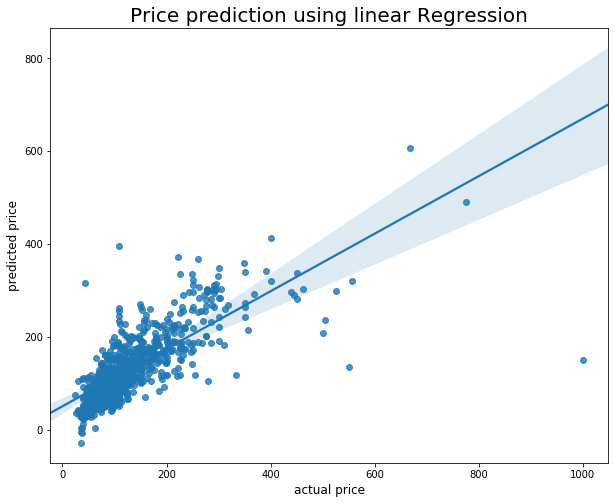

In [47]:
#plot the predicted price, not bad, it is much better than blind guess.
plt.subplots(figsize =(10, 8))
sns.regplot(y_test_p,y_preds_rd) 
plt.xlabel('actual price', size=12)
plt.ylabel('predicted price',size=12)
plt.title('Price prediction using linear Regression',size=20);

[**Back to Top**](#p5)

### <a id='q2'>2.</a> What are the attributes of listings with higher review scores? 

**Higher listing review score means that the occupants had enjoyed their stay here, for which the host can ask for a better price. Also it is likely to attract more orders in the long term. So the hosts better take notes of below insights.<br>**

**From the code section below, it is gathered that listings with below qualities tend to have better review scores:**<br>
1. Host is certified as Airbnb superhost (which means more experience, better service etc. by Airbnb's standards)
2. Host is more responsive (higher response rate and less response time)
3. There are more amenities(fridge, parking, aircon etc, you name it) in the house
4. Listing is in central area
5. Certain property types, such as a YURT!
6. Private room type
7. Flexible cancellation policy

**Some pitfalls of review score have been noticed, so the hosts please try to avoid below:**<br>
1. Response in a few days or more(do you want to rent the house or not?)
2. Univesity district(bad choice...)
3. Certain property types, which includes: dorm and chalets
4. Shared room type
5. Stric cancellation policy

In [49]:
# check the (numerical) features' correlations with the  'review_scores_rating'.
abs_review_corr=listing_cleansed_reviews.corr()[['review_scores_rating']].apply(lambda x: abs(x)).\
    sort_values(by=['review_scores_rating'],ascending=False)

# top 5 correlated numerical features, only show 5 because correlation index is low ~0.1 for top 5 already.
listing_cleansed_reviews.corr()[['review_scores_rating']].loc[abs_review_corr[:5].index]


,review_scores_rating
review_scores_rating,1.000000
host_is_superhost,0.214282
host_response_rate,0.126267
amenities,0.126150
host_listings_count,-0.087018


- - - - - - - - - -  review_scores_rating vs categorical features - - - - - - - - - - 


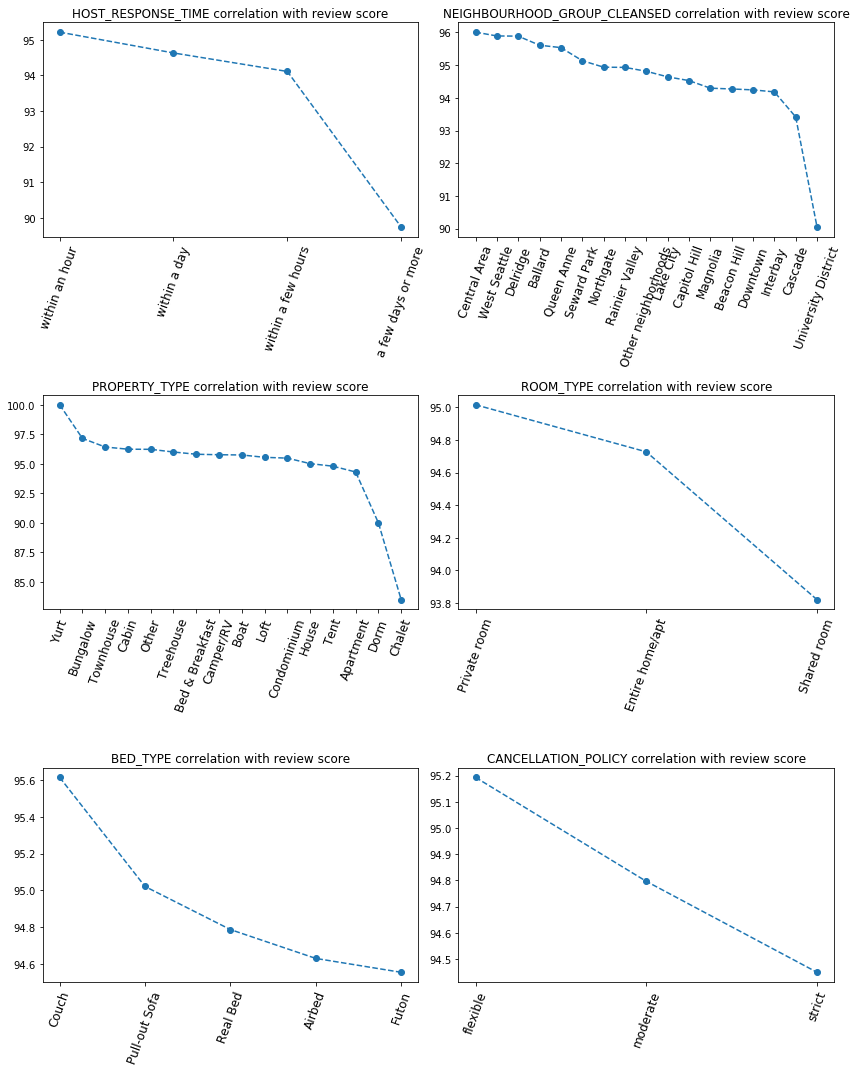

In [50]:
# check categorical features's impact on review scores

print('- '*10,'review_scores_rating vs categorical features','- '*10)
i=1
plt.subplots(figsize=[12,15])
for feature in categorical_features:
    corr=listing_cleansed_reviews.groupby(feature).review_scores_rating.mean().sort_values(ascending=False)
    plt.subplot(3, 2, i)
    plt.plot(corr, 'o--')
    plt.title('{} correlation with review score'.format(feature.upper()))
    plt.xticks(rotation=70, size=12);
    i+=1
    plt.tight_layout()
    
#Analysis on output data
# 1. host_response_time data indicates that inresponsive hosts has much lower reviews
# 2. neighbourhood has impact on user experience although the difference is not large, 
#    except for 'Univeristy district', the score is much lower than the rest. 
# 3. property_type affect people's experience also, with 'Yurt' having the perfect score of 100 
#    and 'Dorm' and 'Chalet' having lower scores.
# 4. 'shared' room_type has slightly lower scores.
# 5. 'couch' has higher scores than 'real bed'? hmm, it's NOT reasonable, more likely a results of randomness.
# 6. 'cancellation_policy' has somewhat correlation on scores


[**Back to Top**](#p5)

### <a id='q3'>3.</a> How does the price change over one year?

**Seen from the price plot drawn in below cell:<br>**
<font color='blue'>**in most neighbourhoods price peak in July,</font> especially in _Downtown_ district price from June to August is much higher than other months in this area.**


In [142]:
# let's get back to the calender data, and some processing is also needed.
# add month feature from date column
calender['month']=calender.date.str.split('-').apply(lambda x: '-'.join(x[:2]))
calender_month=calender.groupby(['neighbourhood','month']).price.mean().reset_index()

#create pivot table to analyse price by month and neighbourhood
calender_pivot=calender_month.pivot(index='month', columns='neighbourhood',values='price').filter(like='2016',axis=0)
calender_pivot.head()

neighbourhood,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
month,,,,,,,,,,,,,,,,,
2016-01,106.819085,97.434985,122.861884,138.879121,118.986304,76.674208,151.918734,116.937255,88.261600,185.880632,87.189873,108.516816,154.538746,89.400886,98.864041,94.003820,139.990405
2016-02,110.033227,96.401518,125.381330,144.141864,122.093812,81.613109,156.857117,112.874126,92.184322,185.428373,88.005780,113.688757,153.775233,89.511774,97.792434,96.716808,136.937485
2016-03,113.237420,94.018613,129.379577,146.517104,123.147360,87.960275,173.549728,119.141935,91.227027,190.361674,89.282902,114.391564,163.659001,93.054608,97.588752,98.777852,137.891341
2016-04,120.999350,99.030576,134.181818,157.135593,128.884648,89.799889,182.228800,116.575646,92.973451,204.425329,91.769274,121.214977,170.429821,100.901802,105.656733,106.583080,145.114359
2016-05,122.753247,102.737389,135.511436,168.933374,134.314932,91.482906,196.796751,116.682310,96.041793,200.872061,96.053719,124.448971,177.208201,103.639314,106.018085,108.026615,146.612736


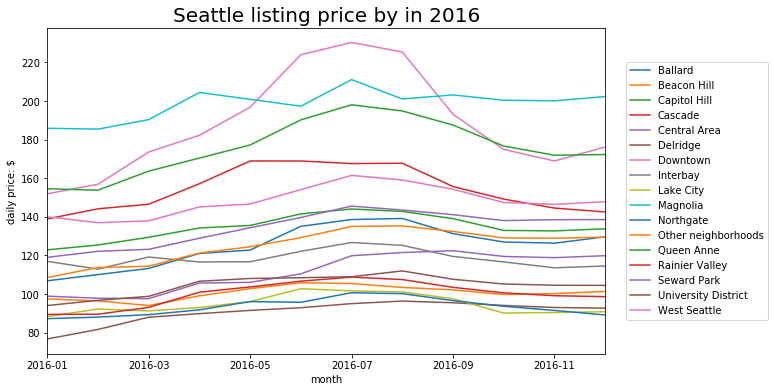

In [143]:
#plot the price agains month, labeled by neighbourhoods

calender_pivot.plot()
fig = plt.gcf()
fig.set_size_inches(10, 6,forward=True)
plt.legend(loc='right',bbox_to_anchor=(1.3,0.5))
plt.title('Seattle listing price by in 2016',size=20)
plt.ylabel('daily price: $');

# 2017-01 has only two days of data, thus may not be representive

[**Back to Top**](#p5)

### <a id='q4'>4.</a> What are the busiest times of the year to visit Seattle?

**Seen from below graph in the last cell, in most areas of Seattle, <font color='blue'>August_ is the most busiest time for visitors.</font> <br>
The odd one is _Capitol Hill_ , where May and September are the peak times. Any Seattle locals may tell what's so special over ther at these times.**

In [ ]:
#lets's get back to reviews data
reviews=pd.read_csv(reviews_path)
reviews.head()

In [179]:

# add month feature regardless of the year
reviews['month']=reviews.date.str.split('-').str.get(1)
reviews['year']=reviews.date.str.split('-').str.get(0)

                                                     
# add minimum_nights to estimate occupancy days, add neighbouthood for analysis
reviews=reviews.merge(listing[['id','minimum_nights','neighbourhood_group_cleansed']], \
                      left_on='listing_id',right_on='id')
                                                     
# checked duplicates is 0                                               
reviews.duplicated().sum() 
                                                     
reviews.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,month,year,id_y,minimum_nights,neighbourhood_group_cleansed
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,07,2015,7202016,2,Queen Anne
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,07,2015,7202016,2,Queen Anne
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",07,2015,7202016,2,Queen Anne
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,08,2015,7202016,2,Queen Anne
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,08,2015,7202016,2,Queen Anne


In [175]:
#group data to gather useful infomation
occupancy=reviews.groupby(['neighbourhood_group_cleansed','month']).\
    minimum_nights.sum().reset_index(name='nights_per_month')
occupancy.head()

,neighbourhood_group_cleansed,month,nights_per_month
0,Ballard,01,408
1,Ballard,02,542
2,Ballard,03,787
3,Ballard,04,741
4,Ballard,05,933


In [178]:
#pivot data for graph drawing
occupancy_pivot=occupancy.pivot(index='month', columns='neighbourhood_group_cleansed',values='nights_per_month')
occupancy_pivot.head()

neighbourhood_group_cleansed,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
month,,,,,,,,,,,,,,,,,
01,408.0,169.0,876.0,80.0,531.0,119.0,1076.0,3.0,45.0,32.0,90.0,1096.0,349.0,213.0,53.0,50.0,188.0
02,542.0,138.0,1844.0,89.0,406.0,143.0,1018.0,NaN,48.0,34.0,83.0,978.0,366.0,188.0,46.0,62.0,171.0
03,787.0,207.0,2314.0,153.0,714.0,193.0,1415.0,NaN,67.0,66.0,145.0,1552.0,586.0,293.0,93.0,93.0,198.0
04,741.0,605.0,1506.0,142.0,742.0,191.0,1470.0,NaN,81.0,59.0,92.0,1700.0,619.0,287.0,85.0,88.0,279.0
05,933.0,771.0,4685.0,174.0,1148.0,271.0,1916.0,7.0,111.0,95.0,181.0,2250.0,896.0,425.0,143.0,77.0,368.0


Date range of below data is between 2009-06-07 and 2016-01-03.


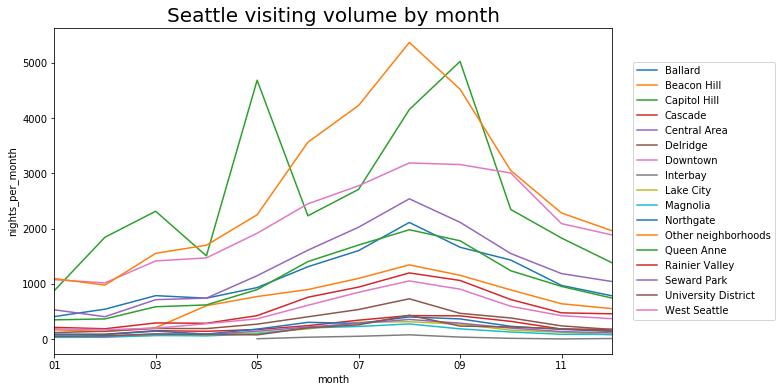

In [177]:
print('Date range of below data is between 2009-06-07 and 2016-01-03.')

#plotting
occupancy_pivot.plot()
fig = plt.gcf()
fig.set_size_inches(10, 6,forward=True)
plt.legend(loc='right',bbox_to_anchor=(1.3,0.5))
plt.title('Seattle visiting volume by month',size=20)
plt.ylabel('nights_per_month');

[**Back to Top**](#p5)